<a href="https://colab.research.google.com/github/sqrt9/ds542-lab/blob/main/static_files/assignments/hw2-shallow_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shallow neural networks


This notebook is composite of the companion notebooks to UDL Book Chapter 3.
Here, you will gain some more familiarity with the shallow neural networks.

In [1]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

## Part 1

<!-- BEGIN QUESTION -->

### Question 1-1 (2 points)

Let's first construct the shallow neural network with one input, three hidden units, and one output described in section 3.1 of the book.

Start by implementing the ReLU function.

In [9]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  # TODO write code to implement the ReLU and compute the activation at the
  # hidden unit from the preactivation
  # This should work on every element of the ndarray "preactivation" at once
  # One way to do this is with the ndarray "clip" function
  # https://numpy.org/doc/stable/reference/generated/numpy.ndarray.clip.html

  activation = preactivation.clip(min=0)

  return activation

<!-- END QUESTION -->

And then let's plot the ReLU function.

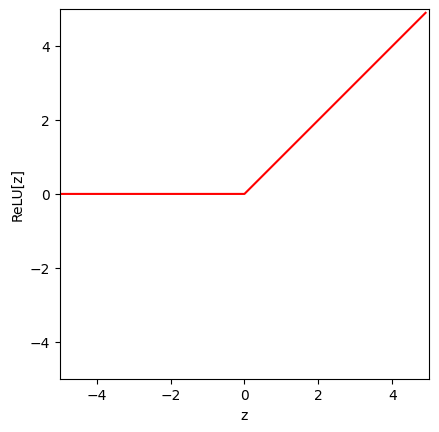

In [10]:
# Make an array of inputs
z = np.arange(-5,5,0.1)
RelU_z = ReLU(z)

# Plot the ReLU function
fig, ax = plt.subplots()
ax.plot(z,RelU_z,'r-')
ax.set_xlim([-5,5]);ax.set_ylim([-5,5])
ax.set_xlabel('z'); ax.set_ylabel('ReLU[z]')
ax.set_aspect('equal')
plt.show()

<!-- BEGIN QUESTION -->

### Question 1-2 (5 points)

We will now define a shallow neural network with one input, one output, and three hidden units.

In [11]:
# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # TODO Complete the code below to compute the three initial lines
  # from the theta parameters (i.e. implement equations at bottom of figure 3.3a-c).  These are the preactivations

  pre_1 = theta_10 + theta_11*x
  pre_2 = theta_20 + theta_21*x
  pre_3 = theta_30 + theta_31*x

  # Pass these through the ReLU function to compute the activations as in
  # figure 3.3 d-f
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  # TODO Complete the code below to weight the activations using phi1, phi2 and phi3
  # To create the equivalent of figure 3.3 g-i

  w_act_1 = phi_1*act_1
  w_act_2 = phi_2*act_2
  w_act_3 = phi_3*act_3

  # TODO Complete the code below to combining the weighted activations and add
  # phi_0 to create the output as in figure 3.3 j

  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

<!-- END QUESTION -->

Here's a plotting function to plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1].

If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3

In [12]:
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, $x$');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

Now we'll define parameters, an input range, run the network on the inputs and plot the results.

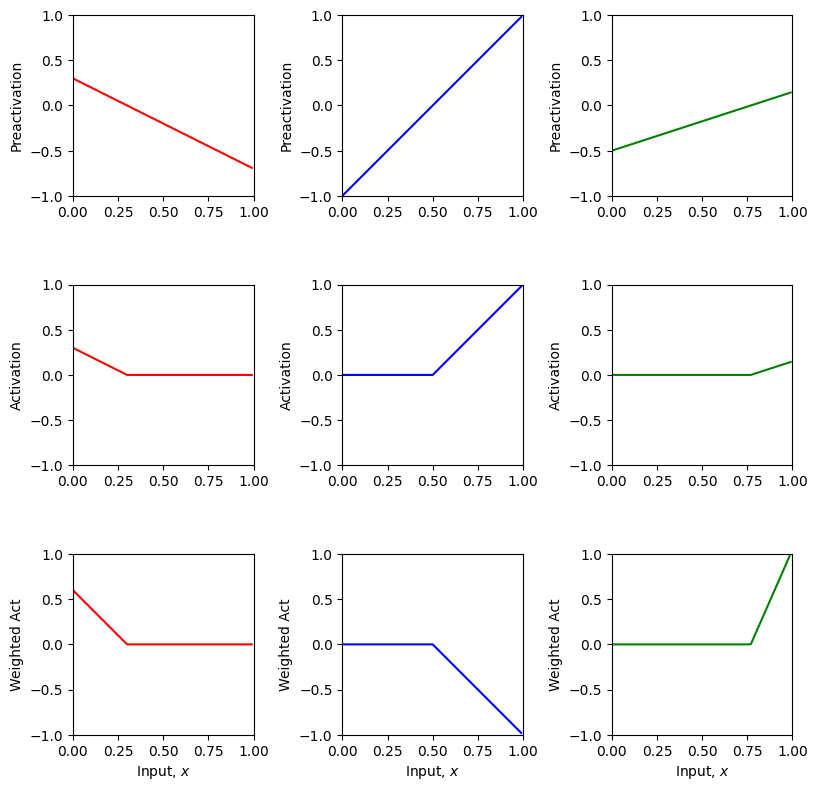

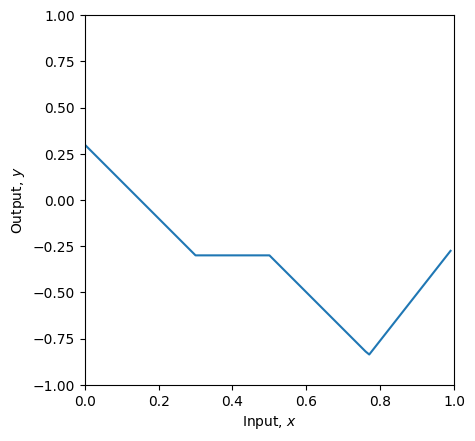

In [13]:
# Now lets define some parameters and run the neural network
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

If your code is correct, then the final output should look like this:


## Part II -- Shallow networks with 2D inputs

The purpose of this part is to gain some familiarity with shallow neural networks with 2D inputs.  It works through an example similar to figure 3.8 and experiments with different activation functions. <br><br>


In [14]:
# Code to draw 2D function -- read it so you know what is going on, but you don't have to change it
def draw_2D_function(ax, x1_mesh, x2_mesh, y):
    pos = ax.contourf(x1_mesh, x2_mesh, y, levels=256 ,cmap = 'hot', vmin=-10,vmax=10.0)
    ax.set_xlabel('x1');ax.set_ylabel('x2')
    levels = np.arange(-10,10,1.0)
    ax.contour(x1_mesh, x2_mesh, y, levels, cmap='winter')

# Plot the shallow neural network.  We'll assume input in is range [0,10],[0,10] and output [-10,10]
def plot_neural_2_inputs(x1,x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3):

  fig, ax = plt.subplots(3,3)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  draw_2D_function(ax[0,0], x1,x2,pre_1); ax[0,0].set_title('Preactivation')
  draw_2D_function(ax[0,1], x1,x2,pre_2); ax[0,1].set_title('Preactivation')
  draw_2D_function(ax[0,2], x1,x2,pre_3); ax[0,2].set_title('Preactivation')
  draw_2D_function(ax[1,0], x1,x2,act_1); ax[1,0].set_title('Activation')
  draw_2D_function(ax[1,1], x1,x2,act_2); ax[1,1].set_title('Activation')
  draw_2D_function(ax[1,2], x1,x2,act_3); ax[1,2].set_title('Activation')
  draw_2D_function(ax[2,0], x1,x2,w_act_1); ax[2,0].set_title('Weighted Act')
  draw_2D_function(ax[2,1], x1,x2,w_act_2); ax[2,1].set_title('Weighted Act')
  draw_2D_function(ax[2,2], x1,x2,w_act_3); ax[2,2].set_title('Weighted Act')
  plt.show()

  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y)
  ax.set_title('Network output, $y$')
  ax.set_aspect(1.0)
  plt.show()

<!-- BEGIN QUESTION -->

### Question 2-1 (5 points)

Define a shallow neural network with two inputs, one output and three hidden units.

In [15]:
# Define a shallow neural network with, two input, one output, and three hidden units
def shallow_2_1_3(x1,x2, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11,\
                  theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32):
  # TODO Complete the lines below to compute the three initial linear functions
  # (figure 3.8a-c) from the theta parameters.  These are the preactivations

  pre_1 = theta_10 + theta_11*x1 + theta_12*x2
  pre_2 = theta_20 + theta_21*x1 + theta_22*x2
  pre_3 = theta_30 + theta_31*x1 + theta_32*x2
  # Pass these through the ReLU function to compute the activations as in
  # figure 3.8 d-f
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  # TODO Complete the code below to weight the activations using phi1, phi2 and phi3
  # To create the equivalent of figure 3.8 g-i

  w_act_1 = phi_1*act_1
  w_act_2 = phi_2*act_2
  w_act_3 = phi_3*act_3


  # TODO Complete the code below to combing the weighted activations and add
  # phi_0 to create the output as in figure 3.8j

  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

<!-- END QUESTION -->

Similarly, we'll define parameters, an input range, run the network on the inputs and plot the results.

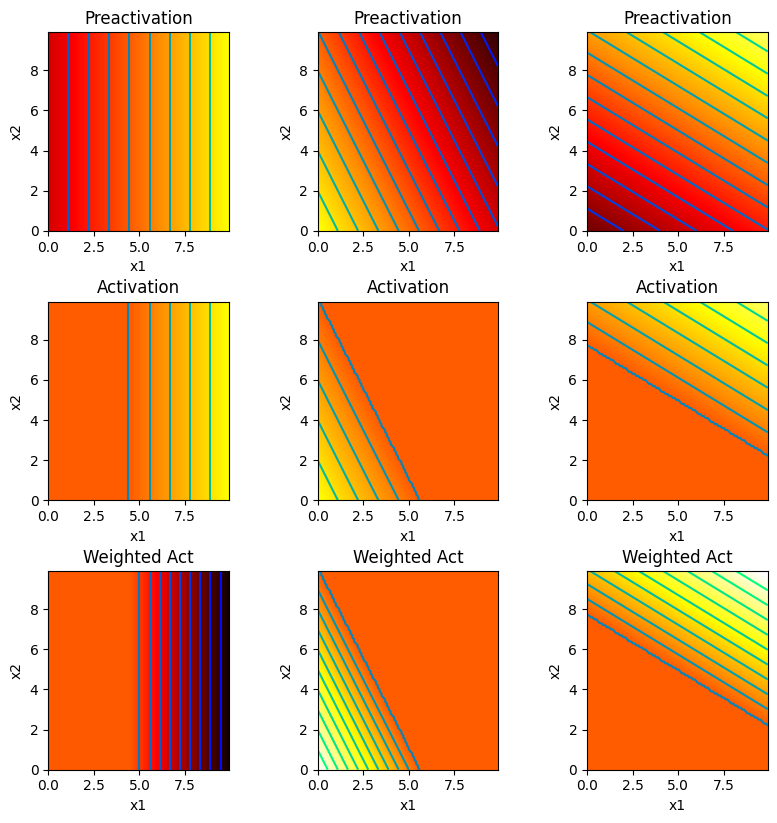

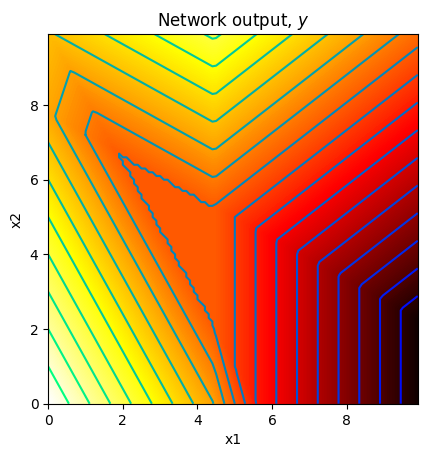

In [16]:
# Now lets define some parameters and run the neural network
theta_10 =  -4.0 ;  theta_11 = 0.9; theta_12 = 0.0
theta_20 =  5.0  ; theta_21 = -0.9 ; theta_22 = -0.5
theta_30 =  -7  ; theta_31 = 0.5; theta_32 = 0.9
phi_0 = 0.0; phi_1 = -2.0; phi_2 = 2.0; phi_3 = 1.5

x1 = np.arange(0.0, 10.0, 0.1)
x2 = np.arange(0.0, 10.0, 0.1)
x1,x2 = np.meshgrid(x1,x2)  # https://www.geeksforgeeks.org/numpy-meshgrid-function/

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_2_1_3(x1,x2, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32)
# And then plot it
plot_neural_2_inputs(x1,x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3)

<!-- BEGIN QUESTION -->

### Question 2-2 (2 points)

How many different linear polytopes are made by this model?  Identify each in the network output.

There are 7 polytopes which are identified where a linear combination of affine regions are active in the plot. This is seen where the slope of the affine region changes (blue lines). Three in the bottom right quadrant, three in the top left quadrant, and one more in the bottom left quadrant.

<!-- END QUESTION -->

Now we'll extend this model to have two outputs $y_1$ and $y_2$, each of which can be visualized with a separate heatmap.  You will now have sets of parameters $\phi_{10}, \phi_{11}, \phi_{12}, \phi_{13}$ and $\phi_{20}, \phi_{21}, \phi_{22}, \phi_{23}$ that correspond to each of these outputs.

First we'll define a function to plot the network.

In [17]:
# Plot the shallow neural network.  We'll assume input in is range [0,10],[0,10] and output [-10,10]
def plot_neural_2_inputs_2_outputs(x1,x2, y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23):

  # Plot intermediate plots if flag set
  fig, ax = plt.subplots(4,3)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  draw_2D_function(ax[0,0], x1,x2,pre_1); ax[0,0].set_title('Preactivation')
  draw_2D_function(ax[0,1], x1,x2,pre_2); ax[0,1].set_title('Preactivation')
  draw_2D_function(ax[0,2], x1,x2,pre_3); ax[0,2].set_title('Preactivation')
  draw_2D_function(ax[1,0], x1,x2,act_1); ax[1,0].set_title('Activation')
  draw_2D_function(ax[1,1], x1,x2,act_2); ax[1,1].set_title('Activation')
  draw_2D_function(ax[1,2], x1,x2,act_3); ax[1,2].set_title('Activation')
  draw_2D_function(ax[2,0], x1,x2,w_act_11); ax[2,0].set_title('Weighted Act 1')
  draw_2D_function(ax[2,1], x1,x2,w_act_12); ax[2,1].set_title('Weighted Act 1')
  draw_2D_function(ax[2,2], x1,x2,w_act_13); ax[2,2].set_title('Weighted Act 1')
  draw_2D_function(ax[3,0], x1,x2,w_act_21); ax[3,0].set_title('Weighted Act 2')
  draw_2D_function(ax[3,1], x1,x2,w_act_22); ax[3,1].set_title('Weighted Act 2')
  draw_2D_function(ax[3,2], x1,x2,w_act_23); ax[3,2].set_title('Weighted Act 2')
  plt.show()

  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y1)
  ax.set_title('Network output, $y_1$')
  ax.set_aspect(1.0)
  plt.show()

  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y2)
  ax.set_title('Network output, $y_2$')
  ax.set_aspect(1.0)
  plt.show()

<!-- BEGIN QUESTION -->

### Question 2-3 (5 points)

Define a shallow neural network with, two inputs, two outputs, and three hidden units.

In [18]:
# Define a shallow neural network with, two inputs, two outputs, and three hidden units
def shallow_2_2_3(x1,x2, activation_fn, phi_10,phi_11,phi_12,phi_13, phi_20,phi_21,phi_22,phi_23, theta_10, theta_11,\
                  theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32):

  # TODO -- write this function -- replace the dummy code below

  # Preactivations (figure 3.8a-c)
  pre_1 = theta_10 + theta_11*x1 + theta_12*x2
  pre_2 = theta_20 + theta_21*x1 + theta_22*x2
  pre_3 = theta_30 + theta_31*x1 + theta_32*x2

  # Activations (figure 3.8d-f)
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  # Weighted activations for y1 (figure 3.8g-i, first output)
  w_act_11 = phi_11*act_1
  w_act_12 = phi_12*act_2
  w_act_13 = phi_13*act_3

  # Weighted activations for y2 (second output)
  w_act_21 = phi_21*act_1
  w_act_22 = phi_22*act_2
  w_act_23 = phi_23*act_3

  # Outputs
  y1 = phi_10 + w_act_11 + w_act_12 + w_act_13
  y2 = phi_20 + w_act_21 + w_act_22 + w_act_23

  # Return everything we have calculated
  return y1,y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23


<!-- END QUESTION -->

As before, we'll define parameters, an input range, run the network on the inputs and plot the results.

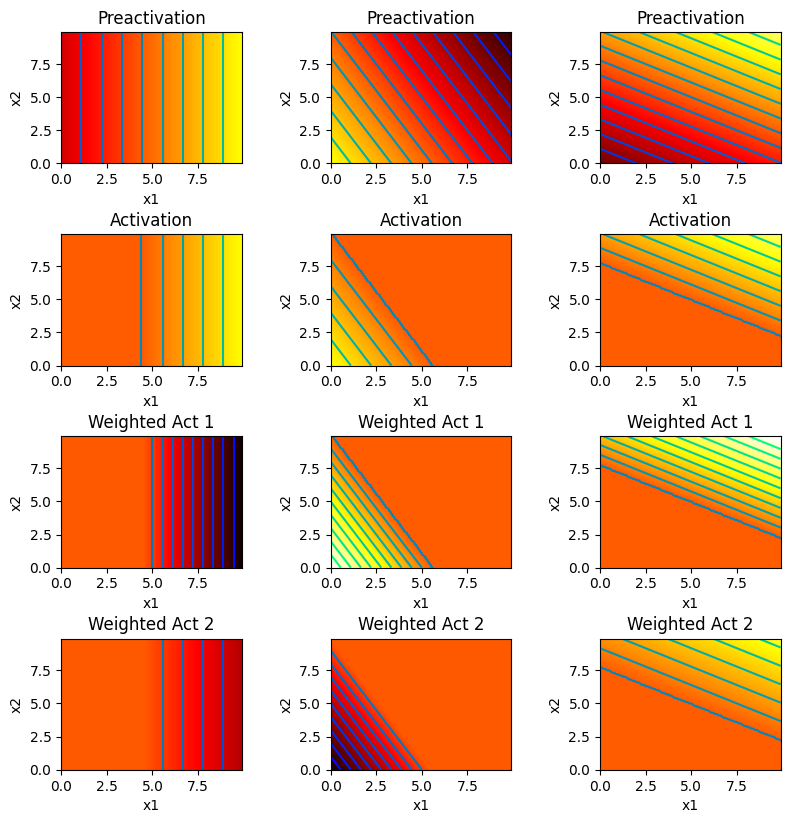

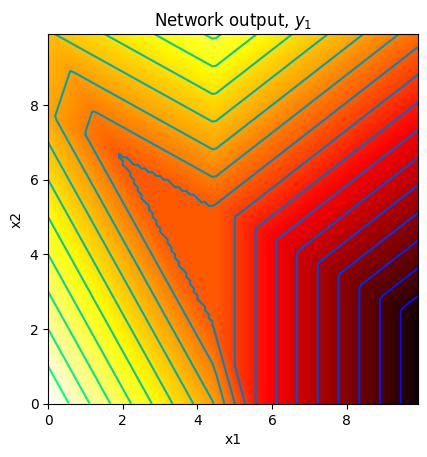

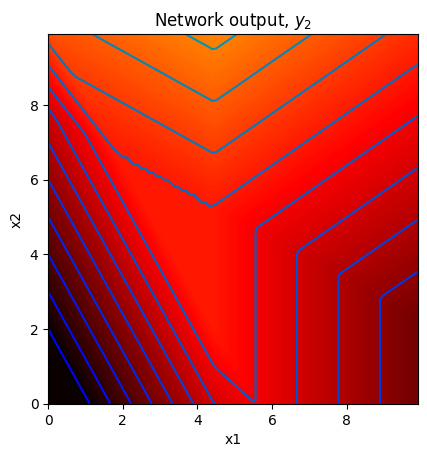

In [19]:
# Now lets define some parameters and run the neural network
theta_10 =  -4.0 ;  theta_11 = 0.9; theta_12 = 0.0
theta_20 =  5.0  ; theta_21 = -0.9 ; theta_22 = -0.5
theta_30 =  -7  ; theta_31 = 0.5; theta_32 = 0.9
phi_10 = 0.0; phi_11 = -2.0; phi_12 = 2.0; phi_13 = 1.5
phi_20 = -2.0; phi_21 = -1.0; phi_22 = -2.0; phi_23 = 0.8

x1 = np.arange(0.0, 10.0, 0.1)
x2 = np.arange(0.0, 10.0, 0.1)
x1,x2 = np.meshgrid(x1,x2)  # https://www.geeksforgeeks.org/numpy-meshgrid-function/

# We run the neural network for each of these input values
y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23 = \
    shallow_2_2_3(x1,x2, ReLU, phi_10,phi_11,phi_12,phi_13, phi_20,phi_21,phi_22,phi_23, theta_10, theta_11, theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32)
# And then plot it
plot_neural_2_inputs_2_outputs(x1,x2, y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23)

## Part III -- Maximum number of linear regions

The purpose of this part of the notebook is to compute the maximum possible number of linear regions as seen in figure 3.9 of the book.


In [ ]:
# Imports math library
import math

<!-- BEGIN QUESTION -->

### Question 3-1 (2 points)

The number of regions $N$ created by a shallow neural network with $D_i$ inputs and $D$ hidden units is given by Zaslavsky's formula:

\begin{equation}N = \sum_{j=0}^{D_{i}}\binom{D}{j}=\sum_{j=0}^{D_{i}} \frac{D!}{(D-j)!j!} \end{equation}



For the special case where $D_i > D$, then $\sum_{j=0}^{D} C(D, j) = 2^D$.

In [31]:
import math
def number_regions(Di, D):
  # TODO -- implement Zaslavsky's formula
  # You can use math.comb() https://www.w3schools.com/python/ref_math_comb.asp
  # Replace this code

  # If Di > D, then replace Di with D.
  N=0
  if Di > D:
    N = 2**D
  else:
    for j in range(0,Di+1):
      N += math.comb(D, j)
  return N

<!-- END QUESTION -->



In [32]:
# Calculate the number of regions for 2D input (Di=2) and 3 hidden units (D=3) as in figure 3.8j
N = number_regions(2, 3)
print(f"Di=2, D=3, Number of regions = {int(N)}, True value = 7")

Di=2, D=3, Number of regions = 7, True value = 7


In [33]:
# Calculate the number of regions for 10D input (Di=10) and 50 hidden units (D=50)
N = number_regions(10, 50)
print(f"Di=10, D=50, Number of regions = {int(N)}, True value = 13432735556")

Di=10, D=50, Number of regions = 13432735556, True value = 13432735556


This works but there is a complication. If the number of hidden units $D$ is fewer than the number of input dimensions $D_i$ , the formula will fail.  When this is the case, there are just $2^D$ regions (see figure 3.10 to understand why). Your `number_regions` function should handle this case.

Let's demonstrate this:

In [34]:
# Depending on how you implemented it, the calculation may fail when $D_i > D$ (not to worry...)
try:
  N = number_regions(10, 8)
  print(f"Di=10, D=8, Number of regions = {int(N)}, True value = 256")
except Exception as error:
    print("An exception occurred:", error)


Di=10, D=8, Number of regions = 256, True value = 256


Now let's plot the graph from figure 3.9a.

Counting regions for 1 input dimensions
Counting regions for 5 input dimensions
Counting regions for 10 input dimensions
Counting regions for 50 input dimensions
Counting regions for 100 input dimensions


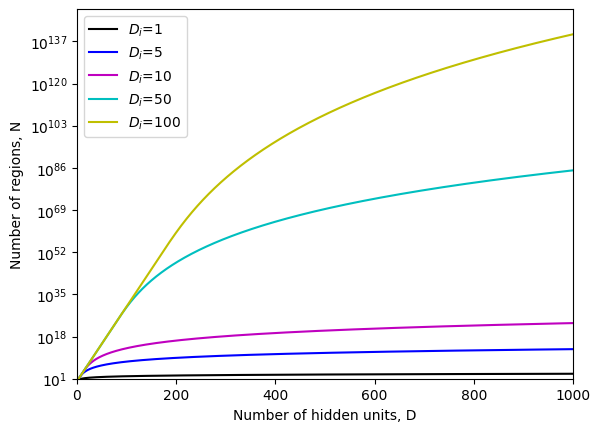

In [30]:
dims = np.array([1,5,10,50,100])
regions = np.zeros((dims.shape[0], 1000))
for c_dim in range(dims.shape[0]):
    D_i = dims[c_dim]
    print (f"Counting regions for {D_i} input dimensions")
    for D in range(1000):
        regions[c_dim, D] = number_regions(np.min([D_i,D]), D)

fig, ax = plt.subplots()
ax.semilogy(regions[0,:],'k-')
ax.semilogy(regions[1,:],'b-')
ax.semilogy(regions[2,:],'m-')
ax.semilogy(regions[3,:],'c-')
ax.semilogy(regions[4,:],'y-')
ax.legend(['$D_i$=1', '$D_i$=5', '$D_i$=10', '$D_i$=50', '$D_i$=100'])
ax.set_xlabel("Number of hidden units, D")
ax.set_ylabel("Number of regions, N")
plt.xlim([0,1000])
plt.ylim([1e1,1e150])
plt.show()

<!-- BEGIN QUESTION -->

### Question 3-2 (2 points)

Now let's compute and plot the number of regions as a function of the number of parameters as in figure 3.9b.

First let's write a function that computes the number of parameters as a function of the input dimension and number of hidden units (assuming just one output)

In [35]:
def number_parameters(D_i, D):
  # TODO -- replace this code with the proper calculation

  # Hidden layer: D neurons each with (D_i weights + 1 bias) => D * (D_i + 1)
  # Output layer: (D weights + 1 bias) => D + 1
  N = D * (D_i + 1) + (D + 1)


  return N ;

<!-- END QUESTION -->



In [36]:
# Now let's test the code
N = number_parameters(10, 8)
print(f"Di=10, D=8, Number of parameters = {int(N)}, True value = 97")

Di=10, D=8, Number of parameters = 97, True value = 97


Counting regions for 1 input dimensions
Counting regions for 5 input dimensions
Counting regions for 10 input dimensions
Counting regions for 50 input dimensions
Counting regions for 100 input dimensions


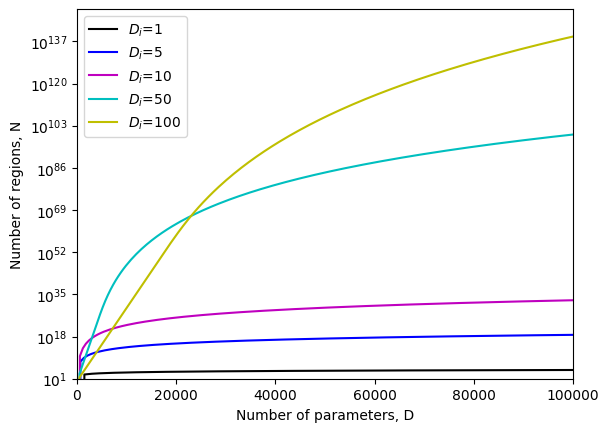

In [37]:
# Now let's plot the graph from figure 3.9b (takes ~1min)
dims = np.array([1,5,10,50,100])
regions = np.zeros((dims.shape[0], 200))
params = np.zeros((dims.shape[0], 200))

# We'll compute the five lines separately this time to make it faster
for c_dim in range(dims.shape[0]):
    D_i = dims[c_dim]
    print (f"Counting regions for {D_i} input dimensions")
    for c_hidden in range(1, 200):
        # Iterate over different ranges of number hidden variables for different input sizes
        D = int(c_hidden * 500 / D_i)
        params[c_dim, c_hidden] =  D_i * D +D + D +1
        regions[c_dim, c_hidden] = number_regions(np.min([D_i,D]), D)

fig, ax = plt.subplots()
ax.semilogy(params[0,:], regions[0,:],'k-')
ax.semilogy(params[1,:], regions[1,:],'b-')
ax.semilogy(params[2,:], regions[2,:],'m-')
ax.semilogy(params[3,:], regions[3,:],'c-')
ax.semilogy(params[4,:], regions[4,:],'y-')
ax.legend(['$D_i$=1', '$D_i$=5', '$D_i$=10', '$D_i$=50', '$D_i$=100'])
ax.set_xlabel("Number of parameters, D")
ax.set_ylabel("Number of regions, N")
plt.xlim([0,100000])
plt.ylim([1e1,1e150])
plt.show()


## Part IV -- Activation functions

The purpose of this part is to experiment with different activation functions.


Plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1].

If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3.

In [38]:
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, $x$');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

First, let's run the network with a ReLU functions

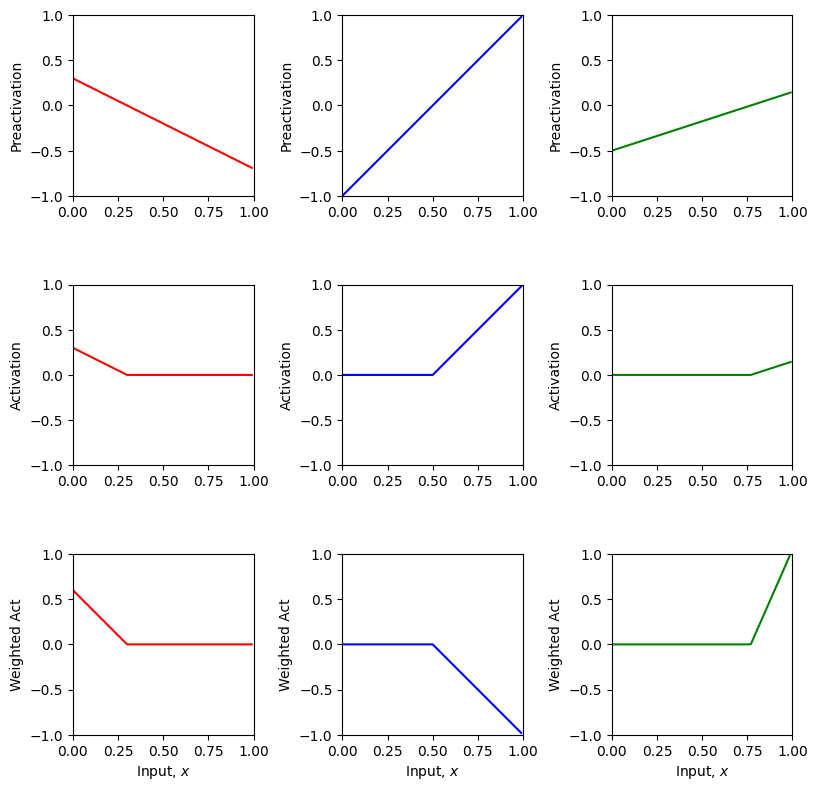

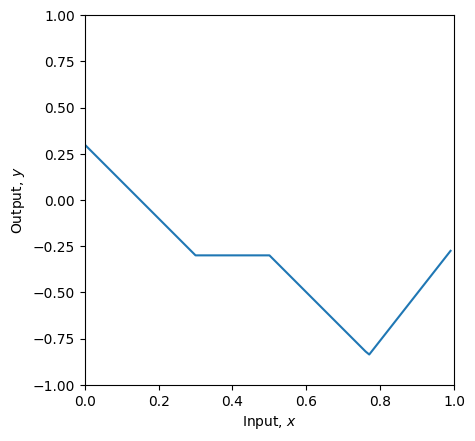

In [39]:
# Now lets define some parameters and run the neural network
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

### Sigmoid activation function

The ReLU isn't the only kind of activation function.  For a long time, people used sigmoid functions.  A logistic sigmoid function is defined by the equation

\begin{equation}
f[z] = \frac{1}{1+\exp{[-10 z ]}}
\end{equation}

(Note that the factor of 10 is not standard -- but it allow us to plot on the same axes as the ReLU examples)

<!-- BEGIN QUESTION -->

### Question 4-1 (2 points)

In [40]:
# Define the sigmoid function
def sigmoid(preactivation):
  # TODO write code to implement the sigmoid function and compute the activation
  # at the hidden unit from the preactivation.  Use the np.exp() function.

  activation = 1/(1+np.exp(-10 * preactivation))

  return activation

<!-- END QUESTION -->



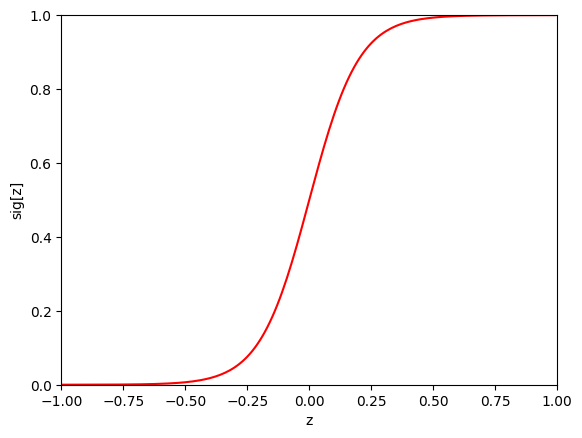

In [41]:
# Make an array of inputs
z = np.arange(-1,1,0.01)
sig_z = sigmoid(z)

# Plot the sigmoid function
fig, ax = plt.subplots()
ax.plot(z,sig_z,'r-')
ax.set_xlim([-1,1]);ax.set_ylim([0,1])
ax.set_xlabel('z'); ax.set_ylabel('sig[z]')
plt.show()

Let's see what happens when we use this activation function in a neural network

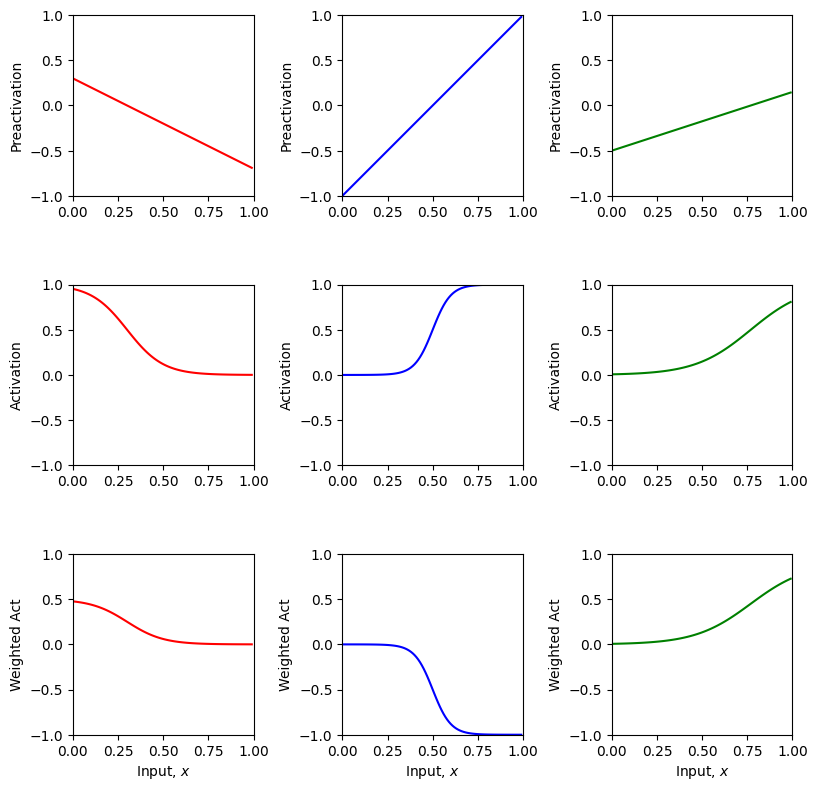

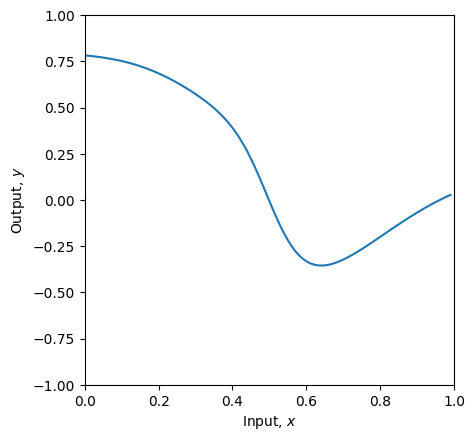

In [42]:
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = 0.3; phi_1 = 0.5; phi_2 = -1.0; phi_3 = 0.9

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, sigmoid, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

You should see that this gives nice smooth curves.  So why don't we use this?  Aha... it's not obvious right now, but we will get to it when we learn to fit models.

### Heaviside activation function

The Heaviside function is defined as:

\begin{equation}
\text{heaviside}[z] = \begin{cases} 0 & \quad z <0 \\ 1 & \quad z\geq 0\end{cases}
\end{equation}

<!-- BEGIN QUESTION -->

### Question 4-2 (2 points)

In [43]:
# Define the heaviside function
def heaviside(preactivation):
  # TODO write code to implement the heaviside function and compute the
  # activation at the hidden unit from the preactivation.  Depending on your
  # implementation you may need to convert a Boolean array to an array of ones
  # and zeros.  To do this, use .astype(int)

  activation = (preactivation >0).astype(int)

  return activation

<!-- END QUESTION -->



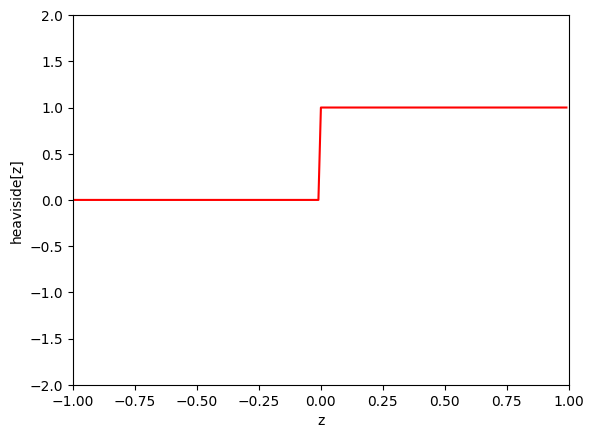

In [44]:
# Make an array of inputs
z = np.arange(-1,1,0.01)
heav_z = heaviside(z)

# Plot the heaviside function
fig, ax = plt.subplots()
ax.plot(z,heav_z,'r-')
ax.set_xlim([-1,1]);ax.set_ylim([-2,2])
ax.set_xlabel('z'); ax.set_ylabel('heaviside[z]')
plt.show()

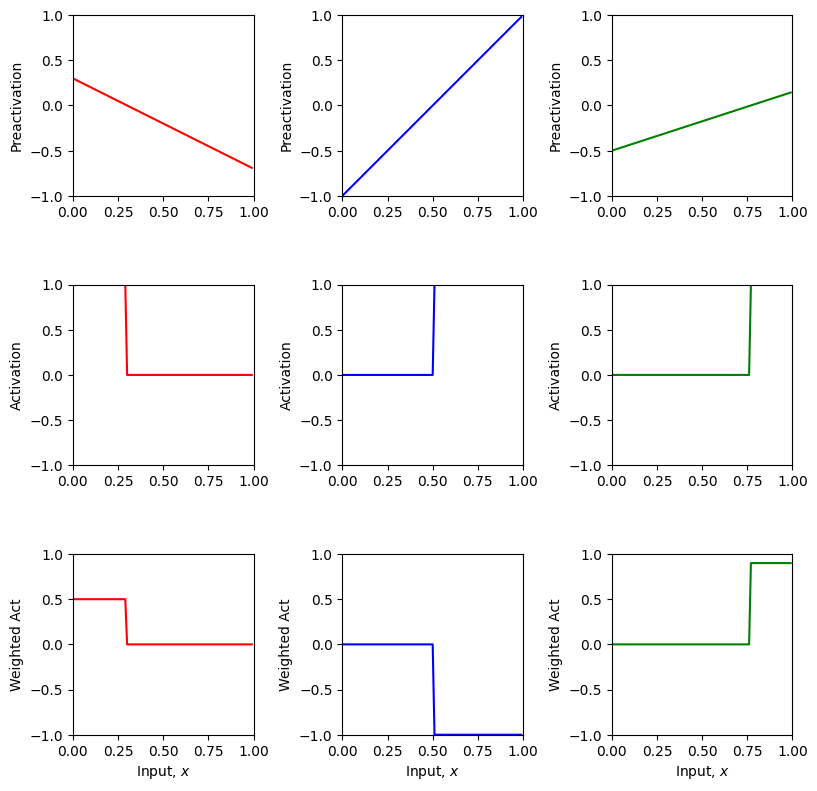

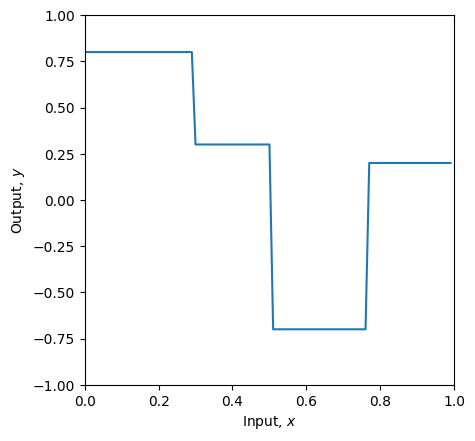

In [45]:
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = 0.3; phi_1 = 0.5; phi_2 = -1.0; phi_3 = 0.9

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, heaviside, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

This can approximate any function, but the output is discontinuous, and there are also reasons not to use it that we will discover when we learn more about model fitting.

### Linear activation functions

Neural networks don't work if the activation function is linear.  For example, consider what would happen if the activation function was:

\begin{equation}
\text{lin}[z] = a + bz
\end{equation}

In [46]:
# Define the linear activation function
def lin(preactivation):
  a = 0
  b = 1
  # Compute linear function
  activation = a+b * preactivation
  # Return
  return activation

Let's plot the intermediate stages and output of the network with a linear activation function.

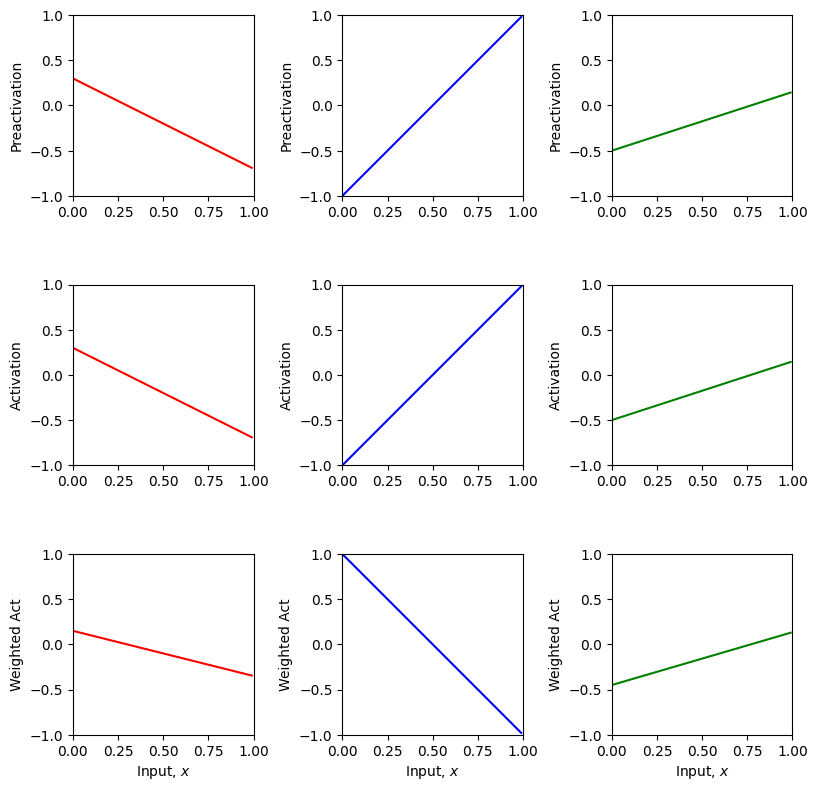

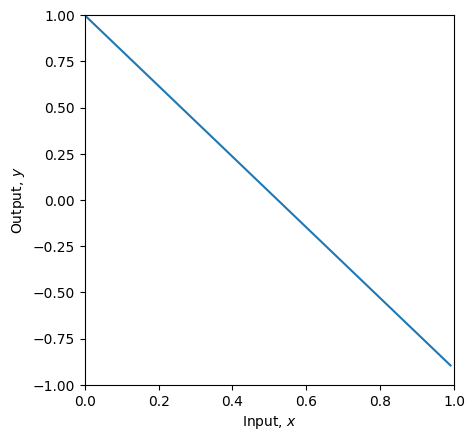

In [47]:
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = 0.3; phi_1 = 0.5; phi_2 = -1.0; phi_3 = 0.9

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, lin, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

<!-- BEGIN QUESTION -->

### Question 4-3 (2 points)

Observe and comment on the output of the network. Why do you think it is the shape that it is?

All the complexity of the previous functions is lost. This is because no matter how many layers the tranformation will always just linear in x if the activations are always linear. This is because the equation at the bottom of 3.3 collapses to some slope-intercept form after after applying the tranformations

<!-- END QUESTION -->

---

### End of notebook

---
